# Step 1: Install and import modules

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [4]:
im_1_path = './car.jpg'
im_2_path = './handwritten.jpg'
im_3_path = './invoice.jpg'

In [5]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

##Example 1


In [6]:
result = recognize_text(im_1_path)

In [7]:
result

[([[208, 66], [264, 66], [264, 114], [208, 114]], 'eis', 0.7874582019081054),
 ([[387, 275], [491, 275], [491, 295], [387, 295]],
  'GLA250',
  0.4985243879632685),
 ([[699, 279], [771, 279], [771, 295], [699, 295]],
  'CMAC',
  0.19313693046569824),
 ([[468, 331], [695, 331], [695, 391], [468, 391]],
  'SN66 XMZ',
  0.7351018711726042)]

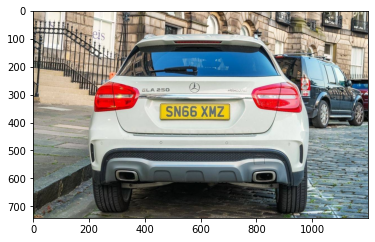

In [8]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [9]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./{save_name}_hilighted.jpg', bbox_inches='tight',dpi=500)

## Car


Detected text: eis (Probability: 0.79)
Detected text: SN66 XMZ (Probability: 0.74)


<Figure size 432x288 with 0 Axes>

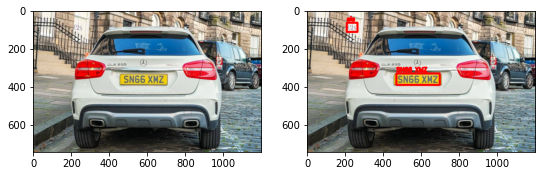

In [10]:
overlay_ocr_text(im_1_path,'1_car')

##HandWritten

Detected text: 1 (Probability: 1.00)
Detected text: just (Probability: 1.00)
Detected text: want (Probability: 0.97)
Detected text: to (Probability: 1.00)
Detected text: hold (Probability: 1.00)
Detected text: your (Probability: 0.81)
Detected text: hand (Probability: 1.00)
Detected text: not (Probability: 1.00)
Detected text: just (Probability: 1.00)
Detected text: In public (Probability: 0.70)
Detected text: for (Probability: 1.00)
Detected text: evaryone (Probability: 0.63)
Detected text: to (Probability: 1.00)
Detected text: 900 (Probability: 0.85)
Detected text: but (Probability: 1.00)
Detected text: In (Probability: 0.86)
Detected text: the (Probability: 0.74)
Detected text: blinding darkness (Probability: 0.83)
Detected text: where (Probability: 0.98)
Detected text: a11 (Probability: 0.77)
Detected text: have (Probability: 1.00)
Detected text: 19 (Probability: 0.58)
Detected text: the (Probability: 0.99)
Detected text: feel. (Probability: 0.99)
Detected text: JmStorm (Probabilit

<Figure size 432x288 with 0 Axes>

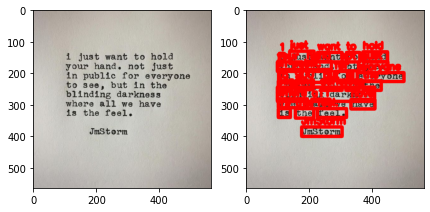

In [11]:
overlay_ocr_text(im_2_path, '2_handwriting')

##Invoice


Detected text: Walmart Inc. (Probability: 0.61)
Detected text: Consolidated Statements of Cash Flows (Probability: 0.89)
Detected text: Fiscal Years Ended January 31, (Probability: 0.66)
Detected text: (Amounts in millions) (Probability: 0.76)
Detected text: 2020 (Probability: 1.00)
Detected text: 2019 (Probability: 0.96)
Detected text: 2018 (Probability: 1.00)
Detected text: Cash flows from operating activities: (Probability: 0.87)
Detected text: Consolidated net income (Probability: 0.97)
Detected text: 15.201 (Probability: 0.94)
Detected text: 7.179 (Probability: 0.74)
Detected text: 10,523 (Probability: 0.85)
Detected text: Adjustments to reconcile consolidated net income to net cash provided by operating (Probability: 0.80)
Detected text: activities: (Probability: 1.00)
Detected text: Depreciation and amortization (Probability: 0.96)
Detected text: 10.987 (Probability: 1.00)
Detected text: 10.678 (Probability: 0.96)
Detected text: 10.529 (Probability: 0.86)
Detected text: Unrealiz

<Figure size 432x288 with 0 Axes>

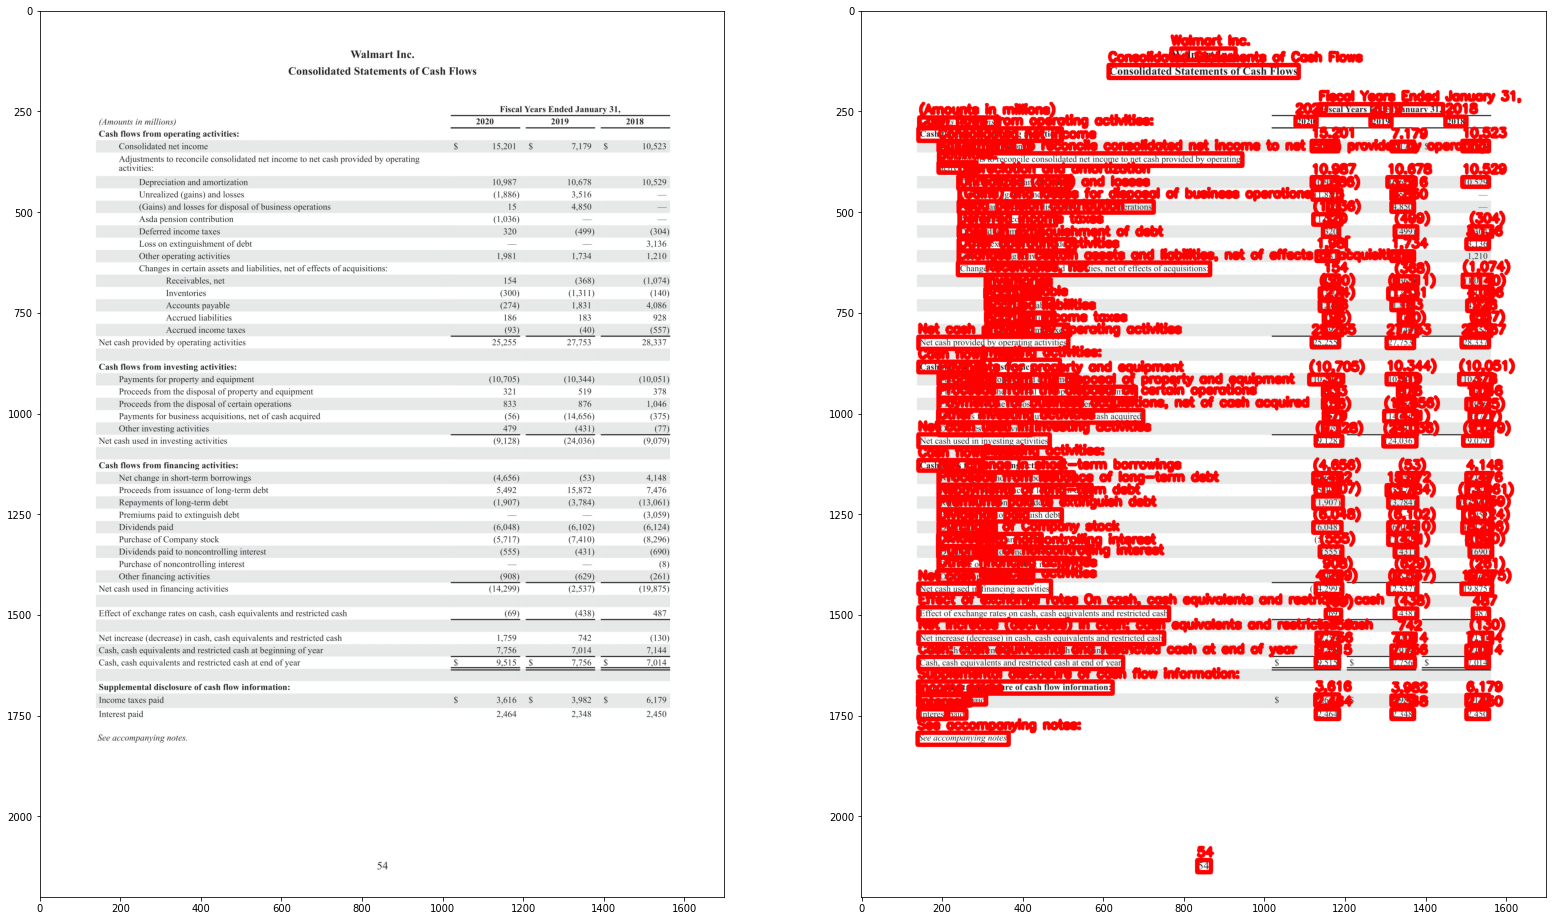

In [12]:
overlay_ocr_text(im_3_path, '3_invoice')